# Lesson 11

* Python Basic, Lesson 6, v1.0.1, 2017.1 by David.Yi   
* Python Basic, Lesson 6, v1.0.2, 2017.5 modified by Yimeng.Zhang  
* v1.1, 2020.4. edit by David Yi

    
### 本次内容要点

* 集合库 collections 简介
    * namedtuple: 生成可以使用名字来访问元素内容的tuple子类
    * deque: 双端队列，可以快速的从另外一侧追加和推出对象
    * defaultdict: 带有默认值的字典
    * OrderedDict: 有序字典
    * Counter: 计数器
* 异常错误处理简介


### collections

collections 是 Python 内建的一个集合模块，提供了许多有用的集合类。我们来完整的看看 collections 提供了哪些扩展功能。

python 内置了大量的功能函数，但是再多的函数和模块也不可能覆盖实际应用需要的所有功能，怎么扩展程序功能，怎么划分功能模块，python 自己所带的这些模块是最好的参考书！

* namedtuple: 生成可以使用名字来访问元素内容的tuple子类
* deque: 双端队列，可以快速的从另外一侧追加和推出对象
* defaultdict: 带有默认值的字典
* OrderedDict: 有序字典
* Counter: 计数器

## namedtuple 有名字的元组

namedtuple 主要用来产生可以使用名称来访问元素的数据对象，通常用来增强代码的可读性，在访问一些 tuple 类型的数据时尤其好用。

namedtuple 是一个函数，它用来创建一个自定义的 tuple 对象，并且规定了 tuple 元素的个数，可以用属性而不是索引来写入或者访问 tuple 的某个元素。

这样一来，我们用 namedtuple 可以很方便地定义一种数据类型，比如 XY 坐标，它具备 tuple 的内容不变性，又可以根据属性来引用，使用十分方便。

In [1]:
# nametuple 举例

from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])
p = Point(1, 2)
print(p.x, p.y)  

1 2


In [2]:
i = p.x + p.y
print(i)

3


In [3]:
# nametuple 举例

from collections import namedtuple

Web = namedtuple('web', ['name', 'type', 'url'])
p1 = Web('google', 'search', 'www.google.com')
p2 = Web('sina', 'portal', 'www.sina.com.cn')

print(p1)

web(name='google', type='search', url='www.google.com')


In [4]:
print(p1.name, p1.url)

google www.google.com


In [5]:
print(p1.url, p2.url)

www.google.com www.sina.com.cn


In [6]:
# 遍历 nametuple

for i in p2:
    print(i)

sina
portal
www.sina.com.cn


In [7]:
# 复杂的基于 namedtuple list demo
from collections import namedtuple

Web = namedtuple('web', ['name', 'type', 'url'])

p = []
p.append(Web('google', 'search', 'www.google.com'))
p.append(Web('sina', 'portal', 'www.sina.com.cn'))
print(p)

for i in p:
    print(i.name)

[web(name='google', type='search', url='www.google.com'), web(name='sina', type='portal', url='www.sina.com.cn')]
google
sina


In [8]:
# 显示 namedtuple 的字段名称

print(Web._fields)

('name', 'type', 'url')


## deque

使用 list 存储数据时，按索引访问元素很快，但是插入和删除元素就很慢了，因为 list 是线性存储，数据量大的时候，插入和删除效率很低。

deque 是为了高效实现插入和删除操作的双向列表，适合用于队列和栈。

deque 在插入数据时候速度比 list 快很多，当然这个是相对存在大量数据的 list 而言的。如果你的程序中需要对有百万级别的 list 频繁的在各个位置插入删除数据，那么用 deque 是值得的。

In [21]:
# deque 举例

from collections import deque

q = deque(['a', 'b', 'c'])
q.append('x')
q.appendleft('y')

print(q)

deque(['y', 'a', 'b', 'c', 'x'])


In [6]:
# 对比 list 和 deque 的速度

from collections import deque
import time

# list
q0 = [x*x for x in range(10000000)]

# list
a = time.time()
q0.insert(0,888)
# q0.append(999)
b = time.time()
print(b-a)

# 生成 deque
q1= deque(q0)

# deque
a = time.time()
q1.appendleft(888)
# q1.append(999)
b = time.time()
print('%2.8f' % (b-a))

0.029897212982177734
0.00005698


In [16]:
from collections import deque

l = ['a','b','c','d']
l = deque(l)
print(l)

deque(['a', 'b', 'c', 'd'])


In [9]:
# deque rotation

l = ['a','b','c','d','e']
l = deque(l)
l.rotate(2)
print(l)
l.rotate(-2)
print(l)

deque(['d', 'e', 'a', 'b', 'c'])
deque(['a', 'b', 'c', 'd', 'e'])


In [13]:
# deque pop() 同样可以区分头尾

l = deque(['a','b','c'])
l.pop()
print(l)

deque(['a', 'b'])


In [14]:
l = deque(['a','b','c'])
l.popleft()
print(l)

deque(['b', 'c'])


## defaultdict

我们都知道，在使用Python原生的数据结构dict的时候，如果用 d[key] 这样的方式访问， 当指定的key不存在时，是会抛出KeyError异常的，也就是发生错误。（当然可以用 get 方法来避免这样的错误）

如果使用defaultdict，只要你传入一个默认的方法，那么请求一个不存在的key时， 便会调用这个方法，使用其结果来作为这个key的默认值。

In [22]:
# 标准的字典用法

i = {'name':'David'}
print(i['name'])

David


In [23]:
# 不存在 key，则会报错

i = {'name':'David'}
print(i['score'])

KeyError: 'score'

In [7]:
# defaultdict 举例

from collections import defaultdict

d = defaultdict(lambda: 100)
d['name']='David'
print(d['name'])

David


In [8]:
# default 返回默认值，不会报错

print(d['score'])
print(d['best_score'])

100
100


In [9]:
from collections import defaultdict

d = defaultdict(lambda: '100')
d['name']='David'
print(d['name'])
print(d['score'])

David
100


## OrderedDict

使用 dict 字典时，Key 是无序的。在对 dict 做迭代访问时，我们无法确定 Key 的顺序。

如果要保持 Key 的顺序，可以用 OrderedDict，这是一个 Key 值有序的字典数据类型。

> 2020.4.30 从 Python 3.7 开始，默认的 dict 是有顺序的，而不是之前版本是乱序的，也就是默认的 dict 就是记住插入的顺序的。所以本节内容意义已经不大了。反过来证明有序字典是一个多么重要的功能点，已经从包中的功能被移植到了主功能中。

In [10]:
# dict 是无序的

d = dict([('a', 1), ('b', 2), ('c', 3)])

print(d)

{'a': 1, 'b': 2, 'c': 3}


In [11]:
# 传统dict 追加一对 key value

d = dict([('a', 1), ('b', 2), ('c', 3)])

print(d)

d['d'] = 4
print(d)

{'a': 1, 'b': 2, 'c': 3}
{'a': 1, 'b': 2, 'c': 3, 'd': 4}


In [3]:
# 使用 OrderedDict

from collections import OrderedDict

d = OrderedDict()
d['a'] = 1
d['b'] = 2
d['c'] = 3

print(d)

OrderedDict([('a', 1), ('b', 2), ('c', 3)])


In [45]:
# 使用 OrderedDict, 追加一对 key value
# OrderedDict 的 key 会按照插入的顺序排列，不是 key 本身排序

from collections import OrderedDict

d = OrderedDict()
d['a'] = 1
d['b'] = 2
d['c'] = 3

print(d)

d['d'] = 4
print(d)

OrderedDict([('a', 1), ('b', 2), ('c', 3)])
OrderedDict([('a', 1), ('b', 2), ('c', 3), ('d', 4)])


In [12]:
# OrderedDict可以实现一个FIFO（先进先出）的dict，当容量超出限制时，先删除最早添加的Key：

from collections import OrderedDict

class LastUpdatedOrderedDict(OrderedDict):

    def __init__(self, capacity):
        super(LastUpdatedOrderedDict, self).__init__()
        self._capacity = capacity

    def __setitem__(self, key, value):
        containsKey = 1 if key in self else 0
        if len(self) - containsKey >= self._capacity:
            last = self.popitem(last=False)
            print('remove:', last)
        if containsKey:
            del self[key]
            print('set:', (key, value))
        else:
            print('add:', (key, value))
        OrderedDict.__setitem__(self, key, value)
        
d = LastUpdatedOrderedDict(4)
d['a'] = 1
d['b'] = 2
d['c'] = 3
print(d)

add: ('a', 1)
add: ('b', 2)
add: ('c', 3)
LastUpdatedOrderedDict([('a', 1), ('b', 2), ('c', 3)])


In [13]:
d['d'] = 4
d['e'] = 5
d['f'] = 6
print(d)

add: ('d', 4)
remove: ('a', 1)
add: ('e', 5)
remove: ('b', 2)
add: ('f', 6)
LastUpdatedOrderedDict([('c', 3), ('d', 4), ('e', 5), ('f', 6)])


In [15]:
# 简化的先进先出Dict

from collections import OrderedDict
d = OrderedDict()
d['a'] = 1
d['b'] = 2
d['c'] = 3
print(d)

# 3个参数：原始有序字典，容量限制，待插入的key，待插入的value
def update_ordereddict(ordered_dict, len_limit ,key, value):
    if len(ordered_dict) >=0 and len(ordered_dict) < len_limit:
        ordered_dict[key]=value
        return ordered_dict
    else:
        ordered_dict.popitem(last=False)
        ordered_dict[key]=value
        return ordered_dict

# 插入一个新key-value
update_ordereddict(d, 3, 'new_key', 4)

OrderedDict([('a', 1), ('b', 2), ('c', 3)])


OrderedDict([('b', 2), ('c', 3), ('new_key', 4)])

## Counter

Counter是一个简单的计数器，例如，统计字符出现的个数：

In [26]:
# Counter类的目的是用来跟踪值出现的次数,以字典的键值对形式存储，其中元素作为key，其计数作为value
# 下面这个例子就是使用 Counter 模块统计一段句子里面所有字符出现次数

from collections import Counter

s = 'A Counter is a dict subclass. '.lower()

c = Counter(s)
# 获取出现频率最高的5个字符
print(c.most_common(5))

[(' ', 6), ('s', 4), ('a', 3), ('c', 3), ('u', 2), ('t', 2), ('i', 2), ('o', 1), ('n', 1), ('e', 1), ('r', 1), ('d', 1), ('b', 1), ('l', 1), ('.', 1)]


In [18]:
# 是否可以统计中文呢？

s = '他会自己长大远去我们也各自远去'

c = Counter(s)

print(c.most_common(5))

[('自', 2), ('远', 2), ('去', 2), ('他', 1), ('会', 1)]


In [24]:
# Counter 举例，用户输入内容

from collections import Counter

s = input('Please input:')

s = s.lower()

c = Counter(s)
# 获取出现频率最高的5个字符
print(c.most_common(5))

Please input:whatisyourname
[('a', 2), ('w', 1), ('h', 1), ('t', 1), ('i', 1)]


In [37]:
# 读出 Counter 对象中的key 和value

s = 'A Counter is a dict subclass. '.lower()
c = Counter(s)

# 用列表生成式获得 counter 中的 key
list1 = [k for k,v in c.most_common()]

# 用列表生成式获得 counter 中的 value
list2 = [v for k,v in c.most_common()]
print(list1)
print(list2)

[' ', 's', 'a', 'c', 'u', 't', 'i', 'o', 'n', 'e', 'r', 'd', 'b', 'l', '.']
[6, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]


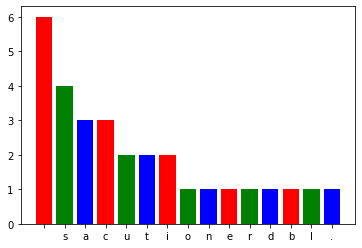

In [38]:
# 我们在 notebook 中画个图

import matplotlib.pyplot as plt
 
plt.bar(range(len(list2)), list2,color='rgb',tick_label=list1)
plt.show()


## 异常错误处理

异常即是一个事件，该事件会在程序执行过程中发生，影响了程序的正常执行。一般情况下，在Python无法正常处理程序时就会发生一个异常。异常是Python对象，表示一个错误。当Python脚本发生异常时我们需要捕获处理它，否则程序会终止执行。



In [6]:
# 看似健壮的程序，输入字母会报错

a = int(input('a:'))
if a ==0:
    print("you cannot input  0")
else: 
    r = 10 / a
    print('result:', r)

a:a


ValueError: invalid literal for int() with base 10: 'a'

In [5]:
# 防止输入0作为除数

try:
    a = int(input('a:'))
    r = 10 / a
    print('result:', r)
except ZeroDivisionError as e:
    print('except:',e)

a:0
except: division by zero


In [13]:
a = int(input('a:'))
r = 10 / a

a:0


ZeroDivisionError: division by zero

In [10]:
# 如何捕捉多个类型的错误？

try:
    a = int(input('a:'))
    r = 10 / a
    print('result:', r)
except ZeroDivisionError as e:
    print('except:',e)
except ValueError as e:
    print('except:',e)


a:0
except: <class 'Exception'> division by zero


In [11]:
# try...except...finally

a = int(input('a:'))

try:
    r = 10 / a
    print('result:', r)
except ZeroDivisionError as e:
    print('except:', e)
finally:
    print('finish...')

a:0
except: division by zero
finish...


In [69]:
# 防止错误举例

a = 100
try:
    b = a + c 
    print(b)
except NameError as e:
    print('except:',e)

except: name 'c' is not defined


In [1]:
# 对 int 进行判断

a = input('a:')

# 对输入值转换还有更完善的方法，设定一个转换结果
try:
    a = int(a)
except ValueError as e:
    print('except:', e)   
    a = 1
finally:
    print('covert ok')
   
try:
    r = 10 / a
    print('result:', r)
except ZeroDivisionError as e:
    print('except:', e)
finally:
    print('finish...')

a:3
covert ok
result: 3.3333333333333335
finish...


## 思考

对于防止错误比较有效的一个方式，就是打印日志，平时俗称的log。我们在学习 python 的过程中，经常会用 print 打印出一些变量的值什么的，其实也是日志的一种方式。打印日志一方面是记录正常的操作，另一方面很大的作用就是用在出错的时候检查。日志大部分时候是一种文本文件，便于存储、查询和归档。python 中也有比较完善的日志处理模块。